<a href="https://colab.research.google.com/github/data2450/Dog-cat-classification-with-transfer-learning/blob/main/Image_Classification_of_cats_vs_dog_CNN_model_important.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Convolutional Neural Network

**first lets connect kaggle and colab**

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/kaggle"

In [ ]:
%cd '/content/drive/My Drive/kaggle'


[Errno 2] No such file or directory: '/content/drive/My Drive/kaggle'
/content


In [ ]:
pwd

'/content/drive/My Drive/kaggle'

In [ ]:
#!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /content/drive/My Drive/kaggle. Or use the environment method.


In [ ]:
#!unzip \*.zip  && rm *.zip

In [ ]:
!ls

sample_data


In [ ]:
train_dir='/content/drive/MyDrive/kaggle/train'



In [ ]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession

#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

In [ ]:
!ls

In [ ]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
tf.__version__

'2.3.0'

# Prepare Traning Data

In [ ]:
filenames =os.listdir("/content/drive/MyDrive/kaggle/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [ ]:
df.head()

,filename,category
0,cat.907.jpg,0
1,cat.9104.jpg,0
2,cat.9067.jpg,0
3,cat.9097.jpg,0
4,cat.9107.jpg,0


In [ ]:
df.tail()

,filename,category
24995,dog.10888.jpg,1
24996,dog.10933.jpg,1
24997,dog.10906.jpg,1
24998,dog.10903.jpg,1
24999,dog.10930.jpg,1


In [ ]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

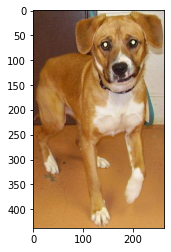

In [ ]:
import random
from keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
sample = random.choice(filenames)
image = load_img("/content/drive/MyDrive/kaggle/train/dog.9921.jpg")
plt.imshow(image)

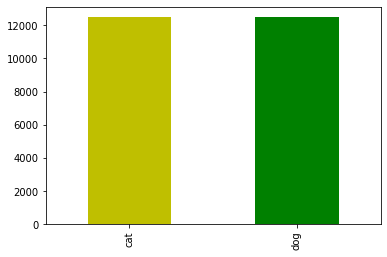

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
df['category'].value_counts().plot.bar(color=('y','g'))


In [ ]:
from sklearn.model_selection import train_test_split
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

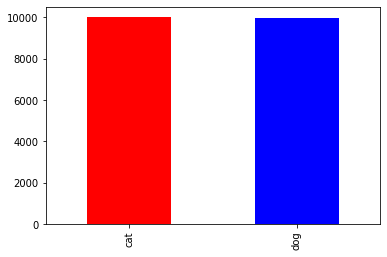

In [ ]:
train_df['category'].value_counts().plot.bar(color=('r','b'))

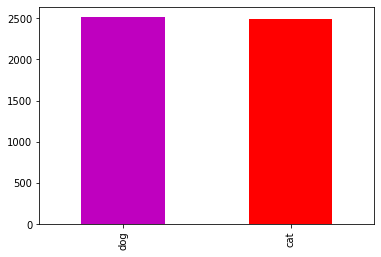

In [ ]:
validate_df['category'].value_counts().plot.bar(color=('m','r'))

**Traning Generator**

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)
    

In [ ]:


train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/MyDrive/kaggle/train", 
    x_col='filename',
    y_col='category',
    target_size=(64, 64),
    class_mode='binary',
    batch_size=32
)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/MyDrive/kaggle/train", 
    x_col='filename',
    y_col='category',
    target_size=(64, 64),
    class_mode='binary',
    batch_size=32
)


Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
#training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/train',
                                                 #target_size = (64, 64),
                                                 #batch_size = 32,
                                                 #class_mode = 'binary')

# Preprocessing the Test set
#test_datagen = ImageDataGenerator(rescale = 1./255)
#test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/test1',
                                            #target_size = (64, 64),
                                            #batch_size = 32,
                                            #class_mode = 'binary')

# bulid model

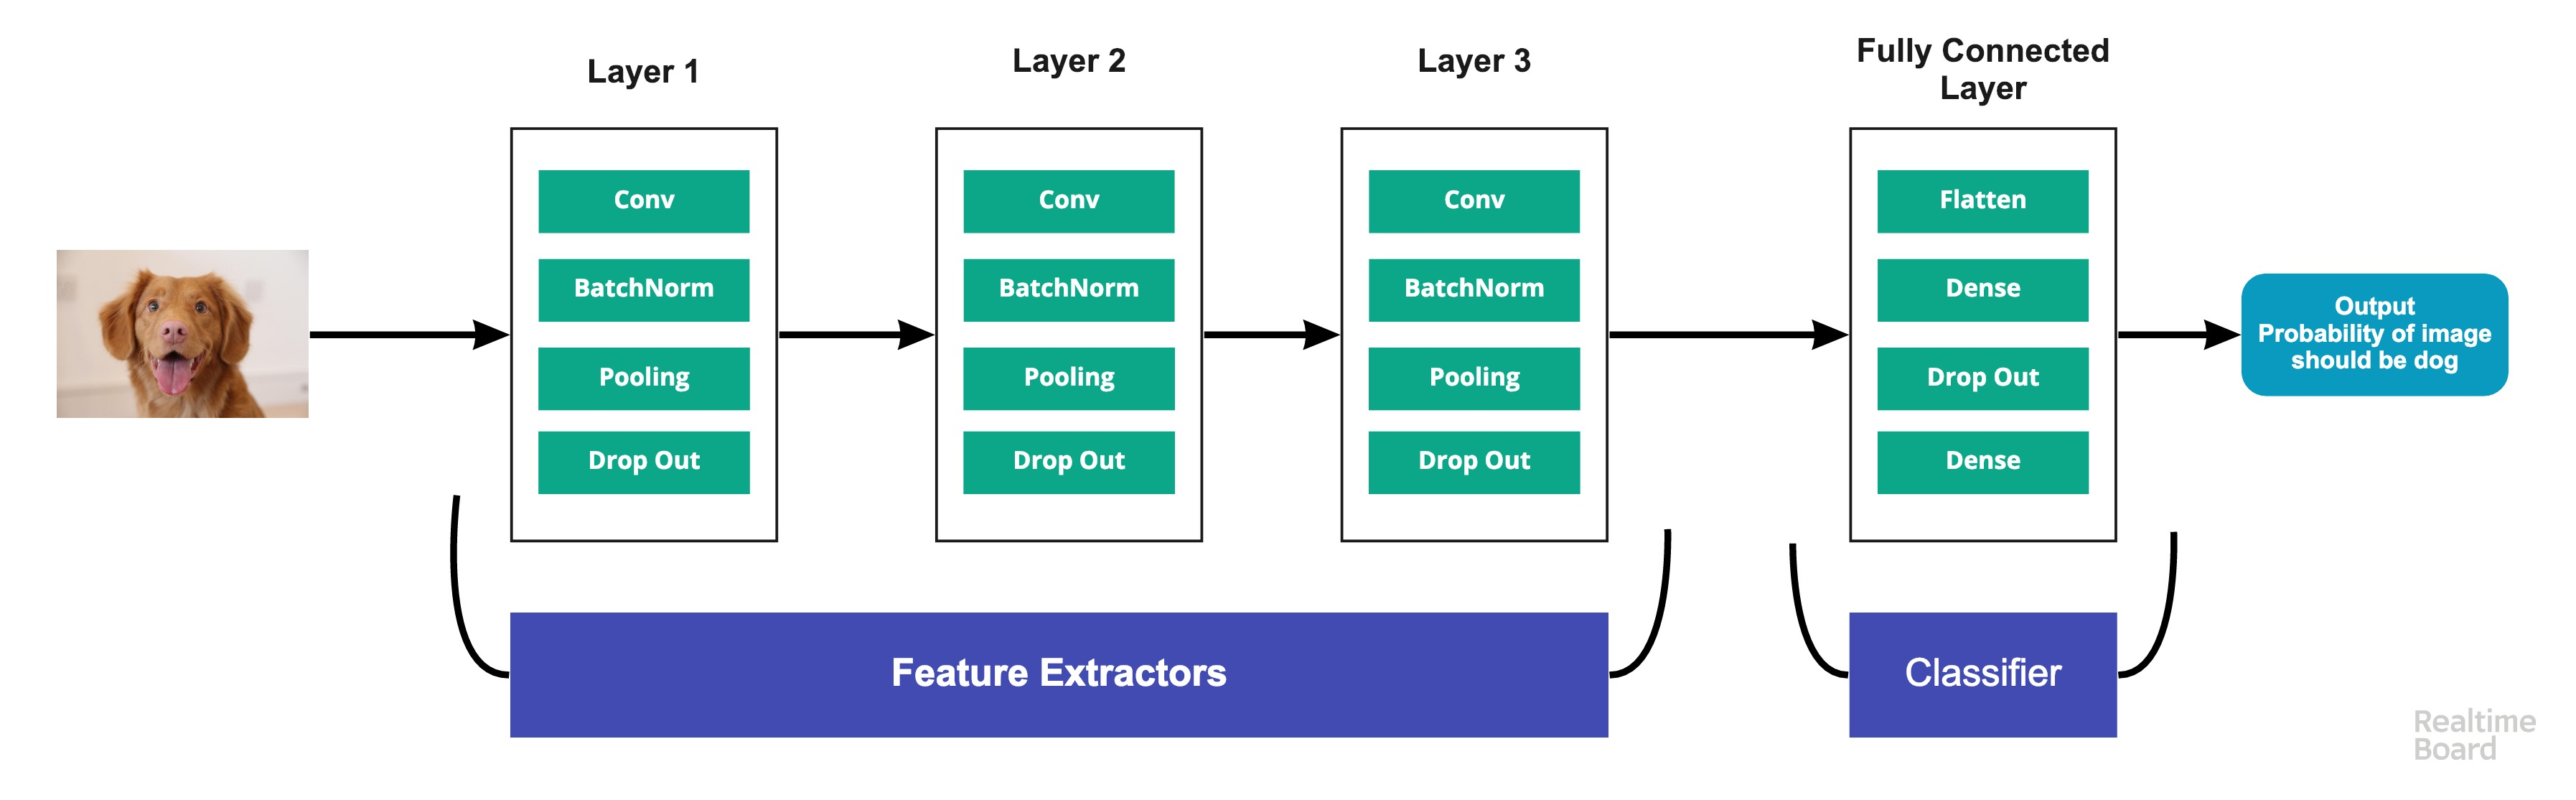

**Input Layer**: It represent input image data. It will reshape image into single diminsion array. 

Example your image is 64x64 = 4096, it will convert to (4096,1) array.

**Conv Layer**: This layer will extract features from image.

**Pooling Layer**: This layerreduce the spatial volume of input image after convolution.

**Fully Connected Layer**: It connect the network from a layer to another layer

**Output Layer**: It is the predicted values layer.

In [ ]:
from tensorflow.keras.layers import Conv2D

In [ ]:
Conv2D(padding="same")

In [ ]:
# Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
# poolsize is the size of the filter 2*2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
cnn.summary()

**What Is an Epoch?**

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.



**What Is the Difference Between Batch and Epoch?**

The batch size is a number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.

The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs, such as a change (or lack of change) in model error over time.

They are both integer values and they are both hyperparameters for the learning algorithm, e.g. parameters for the learning process, not internal model parameters found by the learning process.

You must specify the batch size and number of epochs for a learning algorithm.

There are no magic rules for how to configure these parameters. You must try different values and see what works best for your problem.

**Iteration**

An iteration describes the number of times a batch of data passed through the algorithm. In the case of neural networks, that means the forward pass and backward pass. So, every time you pass a batch of data through the NN, you completed an iteration.

**exmple for iterations**

Say you have a dataset of 10 examples (or samples). You have a batch size of 2, and you've specified you want the algorithm to run for 3 epochs.

Therefore, in each epoch, you have 5 batches (10/2 = 5). Each batch gets passed through the algorithm, therefore you have 5 iterations per epoch. Since you've specified 3 epochs, you have a total of 15 iterations (5*3 = 15) for training.

**Worked Example**

Assume you have a dataset with 200 samples (rows of data) and you choose a batch size of 5 and 1,000 epochs.

This means that the dataset will be divided into 40 batches, each with five samples. The model weights will be updated after each batch of five samples.

This also means that one epoch will involve 40 batches or 40 updates to the model.

With 1,000 epochs, the model will be exposed to or pass through the whole dataset 1,000 times. That is a total of 40,000 batches during the entire training process.

here the one epoch will involve 625 baches or 625 updates ,20000/32

each bach passed through the algorithm ,therefore we have 625 iterations per epoch

since we have 10 epochs,we have a total of (625*10)for training

In [ ]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history=cnn.fit(x = train_generator, validation_data = validation_generator, epochs = 10)

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

cnn.save('model_rcat_dog.h5')

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_rcat_dog.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/kaggle/test1/1.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [ ]:
test_image.shape

(1, 64, 64, 3)

In [ ]:
result
#model says its a dog

array([[0.90491146]], dtype=float32)

In [ ]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/kaggle/test1/9.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [ ]:
result
#model says its a cat

array([[0.17418313]], dtype=float32)

In [ ]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/kaggle/test1/10.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [ ]:
result
#model says its a cat

array([[0.33842134]], dtype=float32)

In [ ]:
def animal(x):
  y=[]
  if x[0]<=0.5:
     y=y.append('dog')
  else:
     y=y.append('cat')
  return y 

# Virtualize Training

In [ ]:

print(model.history)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [ ]:
test_filenames = os.listdir("/content/drive/MyDrive/kaggle/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [ ]:
test_df.head()

,filename
0,11494.jpg
1,11463.jpg
2,11528.jpg
3,11555.jpg
4,11557.jpg


**Create Testing Generator**

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "/content/drive/MyDrive/kaggle/test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(64,64),
    batch_size=32,
    shuffle=False
)

Found 12500 validated image filenames.


# Predict

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/32))

KeyboardInterrupt: ignored

For categoral classication here its binary the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
def converter(x):
  for i in x[0]:
    if i<=0.5:
      print('cat')
    else:
      print('dog')  

In [ ]:
predict

In [ ]:
test_df['category'] = coverter(predict)

In [ ]:
test_df['category'].head()

We will convert the predict category back into our generator classes by using train_generator.class_indices. It is the classes that image generator map while converting data into computer vision

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with {1: 'dog', 0: 'cat'}. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/kaggle/test1"+'/'+filename, target_size=(64,64))
    #img = np.expand_dims(img, axis = 0)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()